In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# Data file paths
county_2015_path = "../Output/2015_cleaned_all_county.csv"
state_2015_path = "../Output/2015_cleaned_state.csv"
county_2017_path = "../Output/2017_cleaned_all_county.csv"
state_2017_path = "../Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [3]:
# Creating 2015 Citizen Poverty DF 
citpov_15_state = state_2015[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_15_state.head()
state_2015_citpov = citpov_15_state.copy()
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap
0,Alabama,4830620,3620994,910480,37973,20780
1,Alaska,733375,523946,74612,64197,30332
2,Arizona,6641928,4526594,1210351,43252,21052
3,Arkansas,2958208,2164083,571519,36626,20072
4,California,38421464,24280349,6260461,56013,27902


In [4]:
# Generate new DF for 2015 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_15 = (state_2015_citpov["Poverty"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["Poverty(%)"] = pov_tpop_prcnt_state_15
cit_tpop_prcnt_state_15 = (state_2015_citpov["VotingAgeCitizen"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_15
citpov_diff_15 = state_2015_citpov["VotingAgeCitizen(%)"] - state_2015_citpov["Poverty(%)"]
state_2015_citpov["CitPovDiff(%)"] = citpov_diff_15
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4830620,3620994,910480,37973,20780,18.848098,74.959198,56.111100
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576


In [19]:
# Creating 2017 Citizen Poverty DF 
citpov_17_state = state_2017[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_17_state.head()
state_2017_citpov = citpov_17_state.copy()
state_2017_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap
0,Alabama,4850771,3651914,871849,40271,22180
1,Alaska,738565,530553,75144,66425,31670
2,Arizona,6809946,4690177,1154434,45816,22712
3,Arkansas,2977944,2183895,541298,39025,21449
4,California,38982847,24970109,5893442,61046,30416


In [18]:
# Generate new DF for 2017 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_17 = (state_2017_citpov["Poverty"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["Poverty(%)"] = pov_tpop_prcnt_state_17
cit_tpop_prcnt_state_17 = (state_2017_citpov["VotingAgeCitizen"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_17
citpov_diff_17 = state_2017_citpov["VotingAgeCitizen(%)"] - state_2017_citpov["Poverty(%)"]
state_2017_citpov["CitPovDiff(%)"] = citpov_diff_17
state_2017_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4850771,3651914,871849,40271,22180,17.973411,75.285228,57.311817
1,Alaska,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330
2,Arizona,6809946,4690177,1154434,45816,22712,16.952176,68.872455,51.920280
3,Arkansas,2977944,2183895,541298,39025,21449,18.176903,73.335664,55.158761
4,California,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054


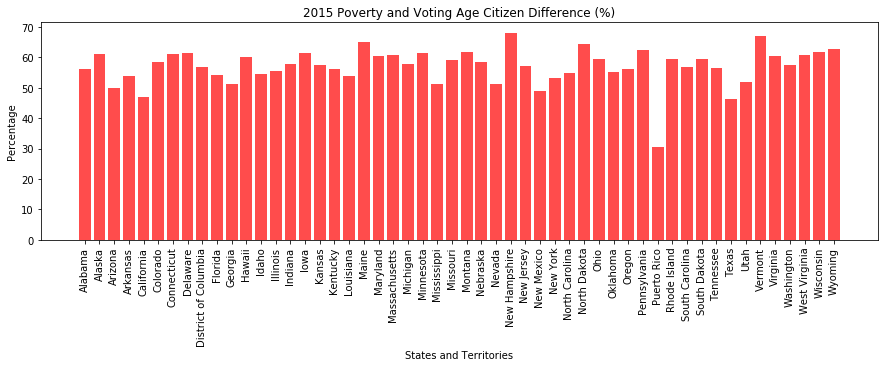

In [5]:
# Bar plot of State 2015 Poverty and Voting Age Citizen differerence (%)
citpovdiff15 = state_2015_citpov["CitPovDiff(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_15, citpovdiff15, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [6]:
# Lowest poverty % 2015
lowest_pov_15 = state_2015_citpov.nsmallest(5, "Poverty(%)")
lowest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
20,Maryland,5930538,4182241,594311,69200,33073,10.021199,70.520432,60.499233
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
6,Connecticut,3593222,2574178,377780,71184,37025,10.513684,71.639826,61.126142
30,New Jersey,8904413,6053893,964839,73014,36084,10.835515,67.987559,57.152044


In [7]:
# Highest Voting Age Citizen % 2015
high_vac_15 = state_2015_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1329100,1048274,185317,46141,25792,13.943044,78.870965,64.927921
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
49,West Virginia,1851420,1455848,333578,39411,21710,18.017414,78.634129,60.616716
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
26,Montana,1014699,781250,154229,44497,25020,15.199483,76.993276,61.793793


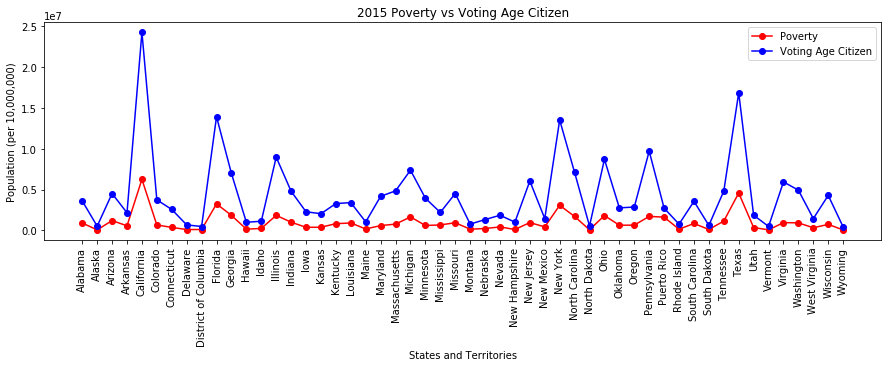

In [8]:
# Line plot of State 2015 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2015 = state_2015_citpov["Poverty"]
citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, povw_plt_2015, marker="o", color="red", label="Poverty")
plt.plot(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (per 10,000,000)")
plt.title("2015 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

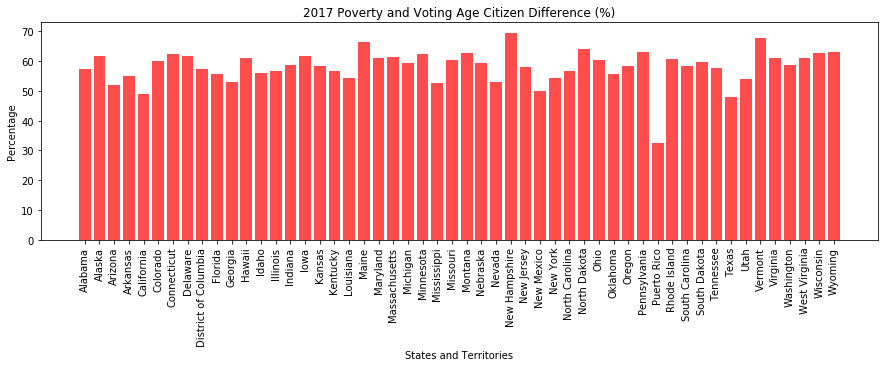

In [11]:
# Bar plot of State 2017 Poverty and Voting Age Citizen differerence (%)
citpovdiff17 = state_2017_citpov["CitPovDiff(%)"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_17, citpovdiff17, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [12]:
# Lowest poverty % 2017
lowest_pov_17 = state_2017_citpov.nsmallest(5, "Poverty(%)")
lowest_pov_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
20,Maryland,5996079,4248702,584091,72541,35127,9.741216,70.858006,61.116790
6,Connecticut,3594478,2599794,362157,74496,39419,10.075371,72.327442,62.252071
1,Alaska,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330
11,Hawaii,1421658,1016468,147143,68663,33930,10.350098,71.498771,61.148673


In [13]:
# Highest Voting Age Citizen % 2017
high_vac_17 = state_2017_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1330158,1055130,171773,49680,27791,12.913729,79.323659,66.409930
46,Vermont,624636,493441,70996,55252,30572,11.365980,78.996568,67.630588
49,West Virginia,1836843,1446498,326916,41701,22859,17.797711,78.749136,60.951426
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
39,Puerto Rico,3468963,2690457,1557395,18412,10244,44.895117,77.557962,32.662845


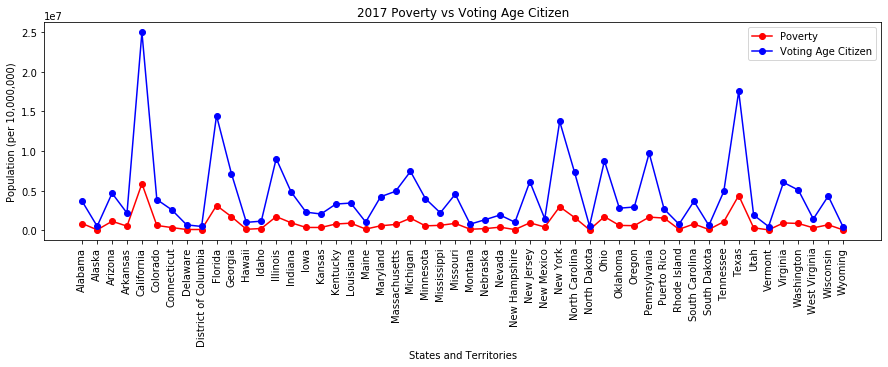

In [14]:
# Line plot of State 2017 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2017 = state_2017_citpov["Poverty"]
citw_plt_2017 = state_2017_citpov["VotingAgeCitizen"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_17, povw_plt_2017, marker="o", color="red", label="Poverty")
plt.plot(state_17, citw_plt_2017, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (per 10,000,000)")
plt.title("2017 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_17]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

In [15]:
# Generating new DF combining 2015 and 2015
combo_1517 = pd.merge(state_2015_citpov, state_2017_citpov, how="left", on=["State"]).rename(columns=
                                                                                             {"TotalPop_x": "TotalPop2015",
                                                                                             "VotingAgeCitizen_x": "VotingAgeCitizen2015",
                                                                                             "Poverty_x": "Poverty2015",
                                                                                             "Income_x": "Income2015",
                                                                                             "IncomePerCap_x": "IncomePerCap2015",
                                                                                             "Poverty(%)_x": "Poverty(%)2015",
                                                                                             "VotingAgeCitizen(%)_x": "VotingAgeCItizen(%)2015",
                                                                                             "CitPovDiff(%)_x": "CitPovDiff(%)2015",
                                                                                             "TotalPop_y": "TotalPop2017",
                                                                                             "VotingAgeCitizen_y": "VotingAgeCitizen2017",
                                                                                             "Poverty_y": "Poverty2017",
                                                                                             "Income_y": "Income2017",
                                                                                             "IncomePerCap_y": "IncomePerCap2017",
                                                                                             "Poverty(%)_y": "Poverty(%)2017",
                                                                                             "VotingAgeCitizen(%)_y": "VotingAgeCItizen(%)2017",
                                                                                             "CitPovDiff(%)_y": "CitPovDiff(%)2017"})

# Calculate differences in Poverty and Adult Population from 2015 to 2017
pov15_pov17_diff = (combo_1517["Poverty2017"] - combo_1517["Poverty2015"]) / combo_1517["Poverty2015"] * 100
combo_1517["Poverty(%)1517Diff"] = pov15_pov17_diff
vac15_vac17_diff = (combo_1517["VotingAgeCitizen2017"] - combo_1517["VotingAgeCitizen2015"]) / combo_1517["VotingAgeCitizen2015"] * 100
combo_1517["VotingAgeCitizen(%)1517Diff"] = vac15_vac17_diff
                                                                                                
combo_1517.head()

,State,TotalPop2015,VotingAgeCitizen2015,Poverty2015,Income2015,IncomePerCap2015,Poverty(%)2015,VotingAgeCItizen(%)2015,CitPovDiff(%)2015,TotalPop2017,VotingAgeCitizen2017,Poverty2017,Income2017,IncomePerCap2017,Poverty(%)2017,VotingAgeCItizen(%)2017,CitPovDiff(%)2017,Poverty(%)1517Diff,VotingAgeCitizen(%)1517Diff
0,Alabama,4830620,3620994,910480,37973,20780,18.848098,74.959198,56.111100,4850771,3651914,871849,40271,22180,17.973411,75.285228,57.311817,-4.242927,0.853909
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330,0.713022,1.261008
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921,6809946,4690177,1154434,45816,22712,16.952176,68.872455,51.920280,-4.619900,3.613821
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430,2977944,2183895,541298,39025,21449,18.176903,73.335664,55.158761,-5.287838,0.915492
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054,-5.862492,2.840816


# Difference in 2015 and 2017 for change in Poverty (%) and Adult Population (%)

Hypothesis: Higher the Adult Population  %, the lower the poverty rates %

Poverty dropped in 2017 from 2015 with an increase in adult population in majority of states.  The lowered poverty rate could be due to the 2016 election and new regulations imposed by the new administration.  However, in coming to find this trend, the overall percentage numbers of both Poverty and Adult Population run mostly in tandem with each other.

New Hampshire appeared in the top 5 for both years under lowest overall poverty percentage and highest overall adult population percentage.

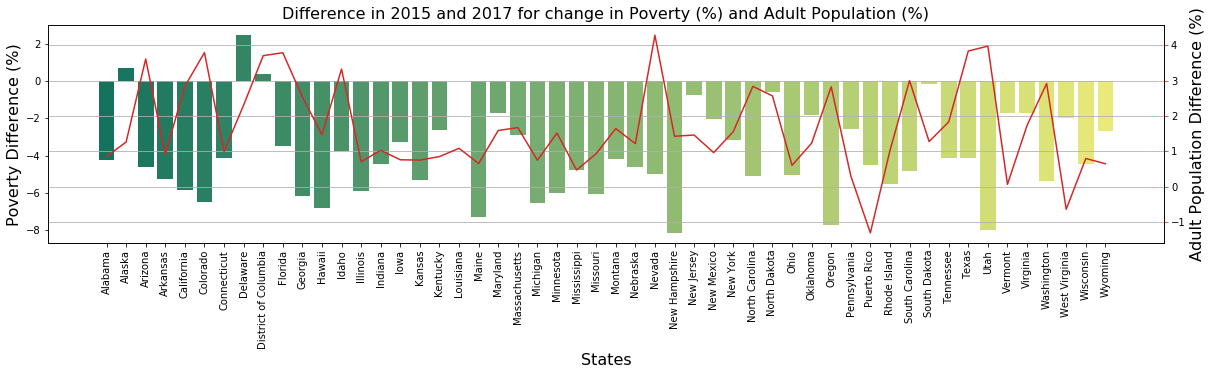

In [16]:
# Create combo chart
fig, ax1 = plt.subplots(figsize=(20,4))
color = 'tab:green'
#bar plot creation
ax1.set_title('Difference in 2015 and 2017 for change in Poverty (%) and Adult Population (%)', fontsize=16)
ax1 = sns.barplot(x='State', y='Poverty(%)1517Diff', data = combo_1517, palette='summer')
ax1.tick_params(axis='y')
# Share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
# Line plot creation
ax2 = sns.lineplot(x='State', y='VotingAgeCitizen(%)1517Diff', data = combo_1517, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax1.set_xlabel('States', fontsize=16)
ax1.set_ylabel('Poverty Difference (%)', fontsize=16)
ax2.set_ylabel('Adult Population Difference (%)', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.grid()

#show plot
plt.show()